# Explorando os dados (aula 1)

## 1.1

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date

In [ ]:
df_total = pd.read_csv('cases-brazil-states.csv')

In [ ]:
df_total[:3]

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,0,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN


In [ ]:
df= df_total[df_total['estado']!='TOTAL']
df['data']=pd.to_datetime(df_total['data']).dt.date
df[:3]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN


## 1.2

Text(0, 0.5, 'Óbitos')

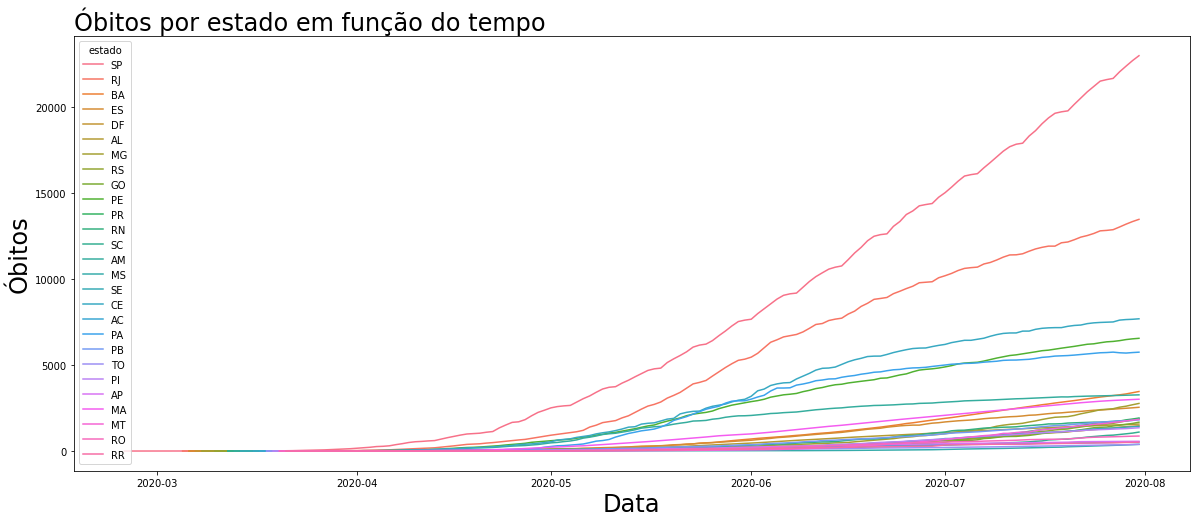

In [ ]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(x='data',y='Obitos',hue='estado',data=df)
fig.set_title('Óbitos por estado em função do tempo', loc='left',fontsize=24)
fig.set_xlabel('Data',fontsize=24)
fig.set_ylabel('Óbitos',fontsize=24)

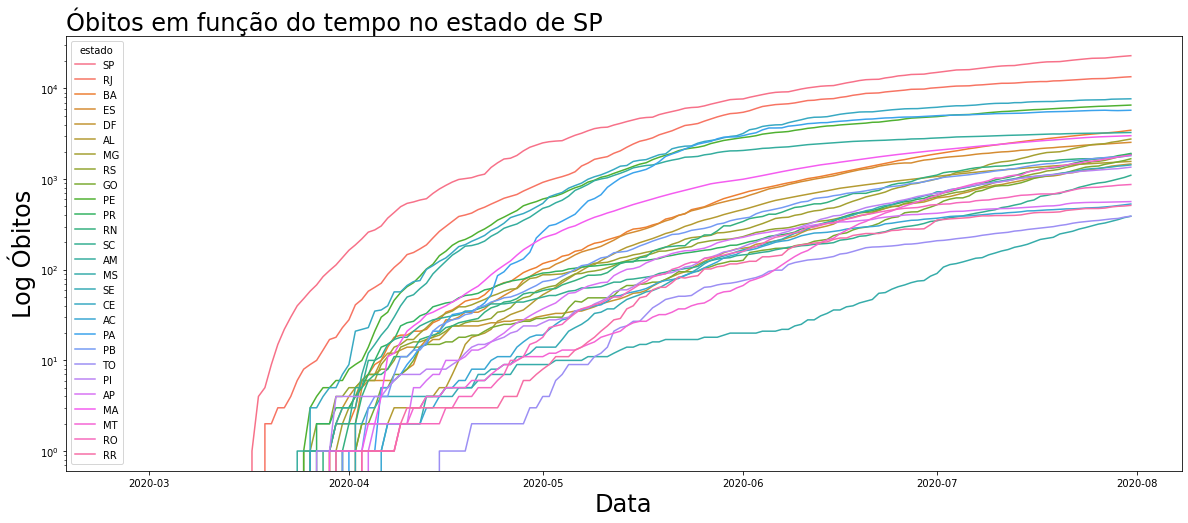

In [ ]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(x='data',y='Obitos',hue='estado',data=df)
fig.set_title('Óbitos em função do tempo no estado de SP',loc='left',fontsize=24)
fig.set_xlabel('Data',fontsize=24)
fig.set_ylabel('Log Óbitos',fontsize=24)
fig.set_yscale('log') # Em escala logarítmica. Não ficou bom. 

In [ ]:
df_sp = df[df['estado'] == 'SP']
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


# Aceleração dos dados e recuperados (aula 2)

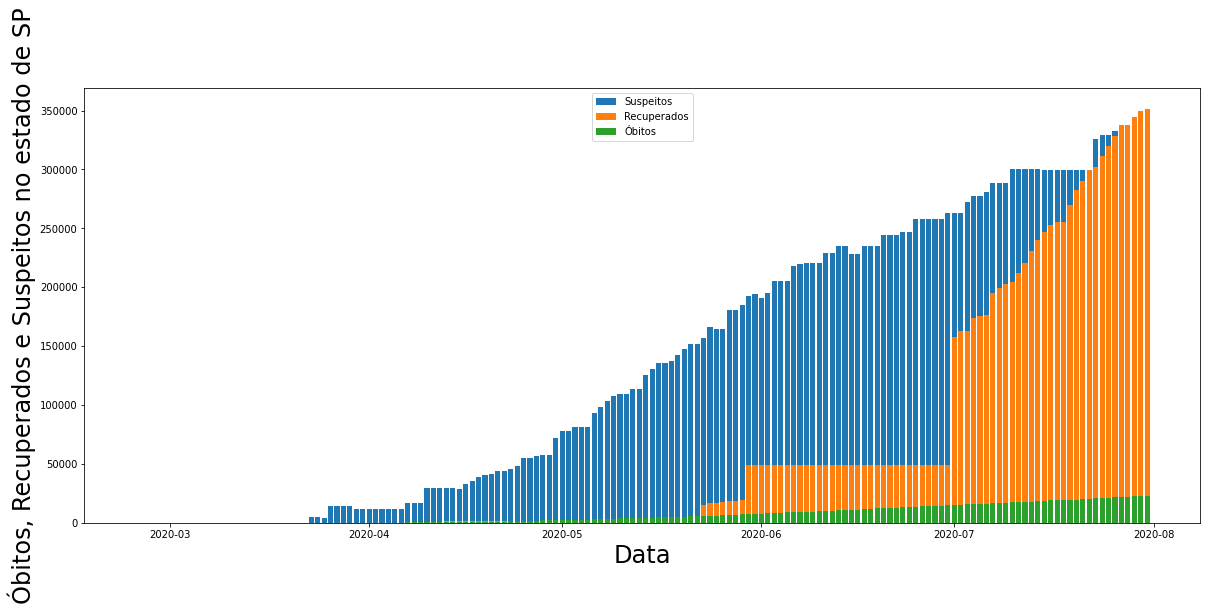

In [ ]:
plt.figure(figsize=(20,8)) #interessante: vários tipos de barras de acordo com a categoria da variável
fig = plt.bar(df_sp.data, df_sp.suspeitos,label='Suspeitos')#barra 1
plt.bar(df_sp.data,df_sp.recuperados,label='Recuperados')#barra 2
plt.bar(df_sp['data'],df_sp['Obitos'],label='Óbitos')#barra 3
plt.xlabel('Data',fontsize=24)
plt.ylabel('Óbitos, Recuperados e Suspeitos no estado de SP',fontsize=24,rotation=90)
plt.legend()

## 2.2 Criando funções para análise exploratória

In [ ]:
def plotar_linha(titulo,xlabel,ylabel,x,y,dataset,hue):
    ax = sns.lineplot(x=x, y=y, hue=hue, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo,loc='left',fontsize=20)
    ax.set_xlabel(xlabel,fontsize=20)
    ax.set_ylabel(ylabel,fontsize=20,rotation=90)

In [ ]:
def plotar_barra(titulo,xlabel,ylabel,x,y,dataset):
    plt.figure(figsize=(20,6))
    ax = plt.bar(dataset[x],dataset[y])
    plt.title(titulo,loc='left',fontsize=20)
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel(ylabel,fontsize=20,rotation=90)

## 2.3 Aceleração de óbitos e casos

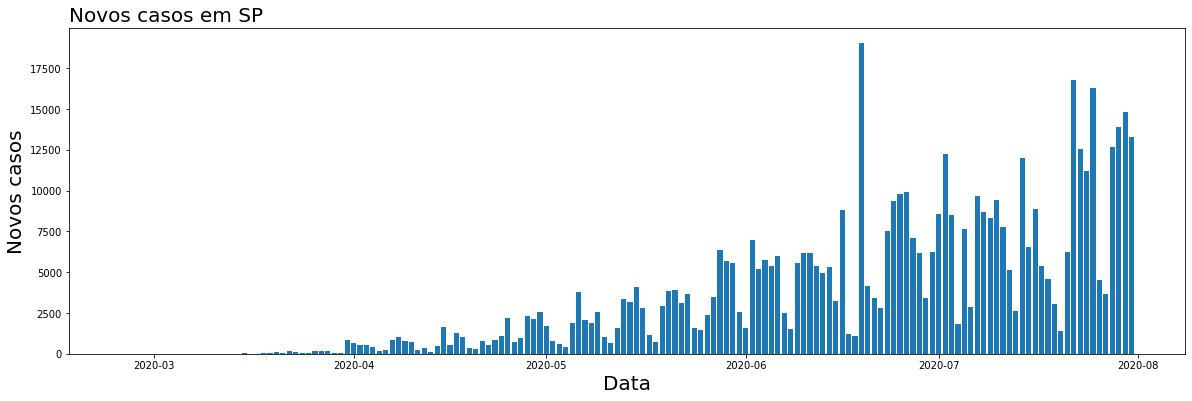

In [ ]:
plotar_barra('Novos casos em SP','Data','Novos casos','data','novosCasos',df_sp)

In [ ]:
#Criando os Diffs()
df_sp['aceleracaoCasos'] = df_sp['novosCasos'].diff()
df_sp['aceleracaoObitos'] = df_sp['novosObitos'].diff()
df_sp.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,-1.0,0.0
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,0.0,0.0
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,1.0,0.0
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,-1.0,0.0


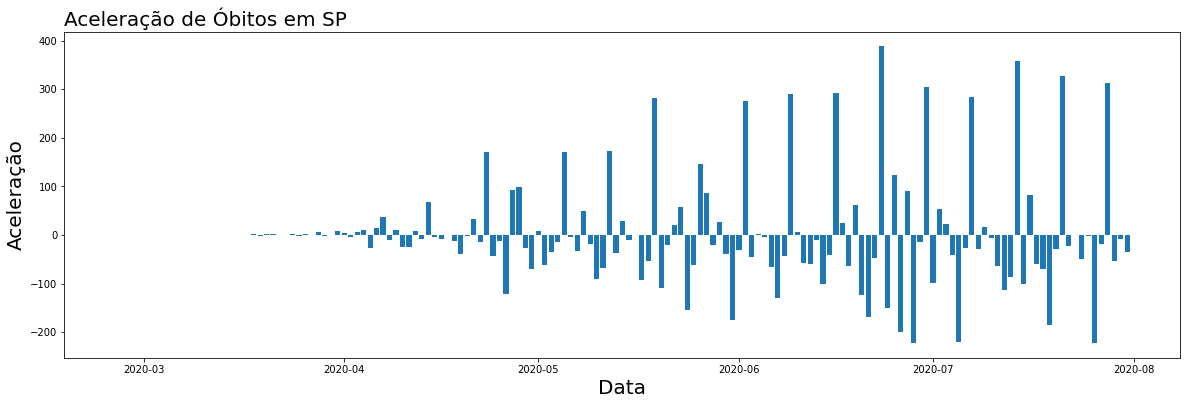

In [ ]:
plotar_barra('Aceleração de Óbitos em SP','Data','Aceleração','data','aceleracaoObitos',df_sp)

## 2.4 Média móvel e subnotificação

In [ ]:
#fazendo as médias móveis
df_sp['mediaObitos'] = df_sp.novosObitos.rolling(window=7,center=False).mean()
df_sp['mediaObitos_14'] = df_sp.novosObitos.rolling(window=14,center=False).mean()
df_sp.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,...,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos,mediaObitos,mediaObitos_14
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,0.00218,0.0,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,0.00218,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,...,0.00436,0.0,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,...,0.00436,0.0,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN
10,10,2020-03-01,Brazil,SP,TOTAL,0,0,0,2,0,...,0.00436,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
12,10,2020-03-02,Brazil,SP,TOTAL,0,0,0,2,0,...,0.00436,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
14,10,2020-03-03,Brazil,SP,TOTAL,0,0,0,2,0,...,0.00436,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN
16,10,2020-03-04,Brazil,SP,TOTAL,0,0,1,3,0,...,0.00653,0.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,NaN
19,10,2020-03-05,Brazil,SP,TOTAL,0,0,3,6,0,...,0.01307,0.0,NaN,NaN,NaN,NaN,2.0,0.0,0.0,NaN


<BarContainer object of 158 artists>

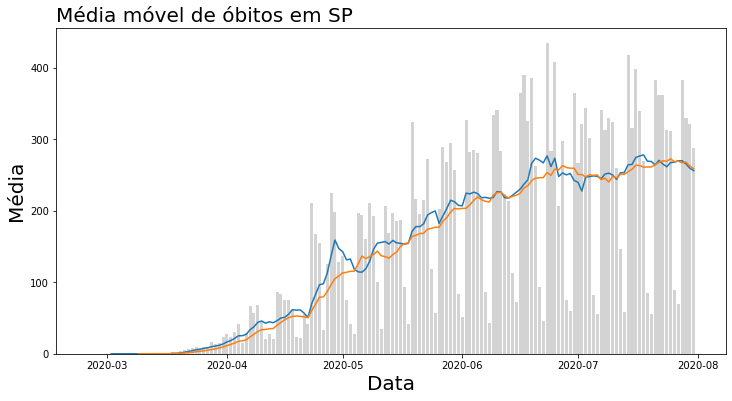

In [ ]:
#interessante, os gráficos de barra e linha "Somam-se"
plotar_linha('Média móvel de óbitos em SP','Data','Média','data','mediaObitos',df_sp,None)
plotar_linha('Média móvel de óbitos em SP','Data','Média','data','mediaObitos_14',df_sp,None)
plt.bar(df_sp['data'],df_sp['novosObitos'],color='lightgrey')

# Correlação e autocorrelação ( aula 3 )

### 3.1 Autocorrelação e correlação

In [ ]:
from pandas.plotting import autocorrelation_plot

## 3.2 Correlação e óbitos

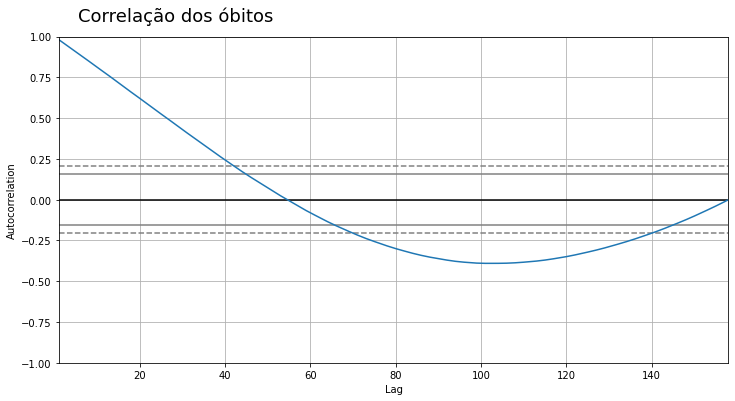

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação dos óbitos',fontsize=18,x=0.26,y=0.95)
autocorrelation_plot(df_sp['Obitos'])
ax = ax #dentro de duas semanas a correlação é muito autocorrelacionada ainda. porém, após muito tempo essa correlação cai muito.

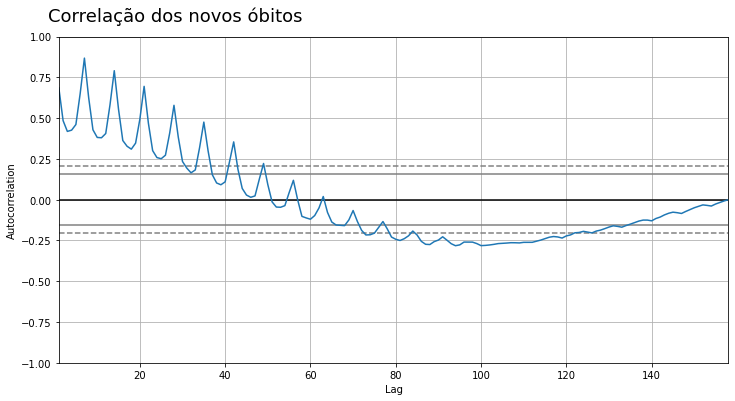

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação dos novos óbitos',fontsize=18,x=0.26,y=0.95)
autocorrelation_plot(df_sp['novosObitos'])
ax=ax #mostra uma sazonalidade semanal. Provavelmente no final de semana ocorria muito contágio. 

## 3.3 Autocorrelação da média e da aceleração

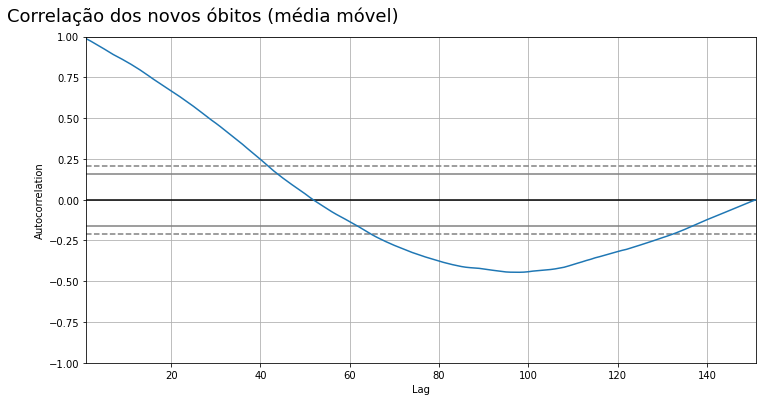

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação dos novos óbitos (média móvel)',fontsize=18,x=0.26,y=0.95)
autocorrelation_plot(df_sp['mediaObitos'][7:]) # a média começa a partir do 7º dia
ax=ax #comportamento parecido. mas não tem as oscilações decorrentes da sazonalidade

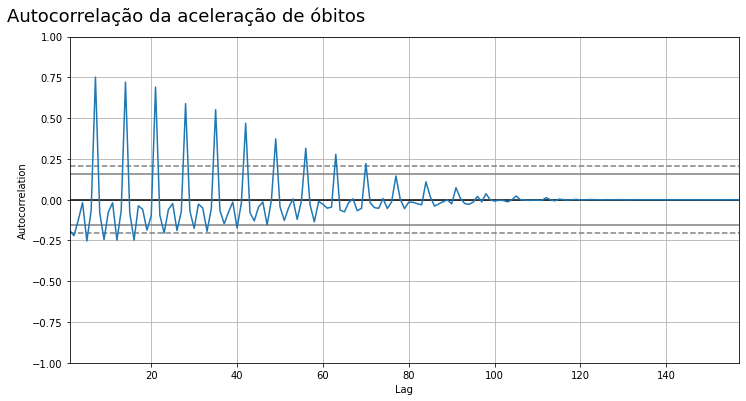

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Autocorrelação da aceleração de óbitos',fontsize=18,x=0.26,y=0.95)
autocorrelation_plot(df_sp['aceleracaoObitos'][1:])
ax=ax #essa oscinação indica que durante um período da semana não tínhamos informações sificientes para analisar. Não é que a pandemia estava diminuindo.

# Falando de sazonalidade (aula 4)

## 4.1 O que é sazonalidade?

In [ ]:
df_sp['mes']=pd.to_datetime(df_sp['data'])
df_sp['dia_da_semana'] = df_sp['mes'].dt.day_name()
df_sp.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,...,recuperados,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos,mediaObitos,mediaObitos_14,mes,dia_da_semana
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-25,Tuesday
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,2020-02-26,Wednesday
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,2020-02-27,Thursday
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,...,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,2020-02-28,Friday
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,...,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,2020-02-29,Saturday


In [ ]:
dias_traduzidos = {'Tuesday':'Terça','Wednesday':'Quarta','Thursday':'Quinta','Friday':'Sexta',
                   'Saturday':'Sabado','Sunday':'Domingo','Monday':'Segunda'}

In [ ]:
df_sp['dia_da_semana'] = df_sp['dia_da_semana'].map(dias_traduzidos)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
agrupados_sp=df_sp.groupby('dia_da_semana')['Obitos','novosObitos','aceleracaoObitos'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
agrupados_sp['dia_da_semana']=agrupados_sp.index
agrupados_sp.head(7)

,Obitos,novosObitos,aceleracaoObitos,dia_da_semana
dia_da_semana,,,,
Domingo,6846.500000,60.409091,-94.818182,Domingo
Quarta,6975.260870,181.217391,-25.173913,Quarta
Quinta,7165.260870,190.000000,8.782609,Quinta
Sabado,6786.090909,155.227273,-16.954545,Sabado
Segunda,6887.090909,40.590909,-19.818182,Segunda
Sexta,7342.434783,177.173913,-12.826087,Sexta
Terça,6794.043478,206.391304,175.181818,Terça


In [ ]:
agrupados_sp=agrupados_sp.reindex(['Domingo','Segunda','Terça','Quarta','Quinta','Sexta','Sabado'])#reordenando os index

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


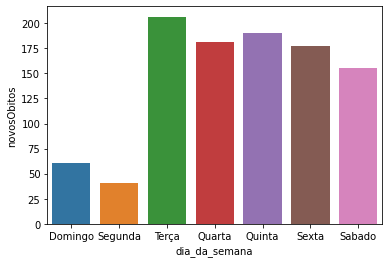

In [ ]:
sns.barplot(agrupados_sp['dia_da_semana'],agrupados_sp['novosObitos'])

## 4.2 Criando variáveis

In [ ]:
def criar_features(df,label=None):
    df = df.copy()
    df['diasemana'] = df['mes'].dt.dayofweek
    df['mês'] = df['mes'].dt.month
    df['diamês'] = df['mes'].dt.day

    X = df[['diasemana','mês','diamês']]

    if label:
        y = df[label]
        return X,y
    return X

In [ ]:
X,y = criar_features(df_sp, label = 'Obitos')

In [ ]:
df_final = pd.concat([X,y],axis = 1)

In [ ]:
df_final.head(10)

,diasemana,mês,diamês,Obitos
0,1,2,25,0
2,2,2,26,0
4,3,2,27,0
6,4,2,28,0
8,5,2,29,0
10,6,3,1,0
12,0,3,2,0
14,1,3,3,0
16,2,3,4,0
19,3,3,5,0


## 4.3 Plotando as novas variáveis 

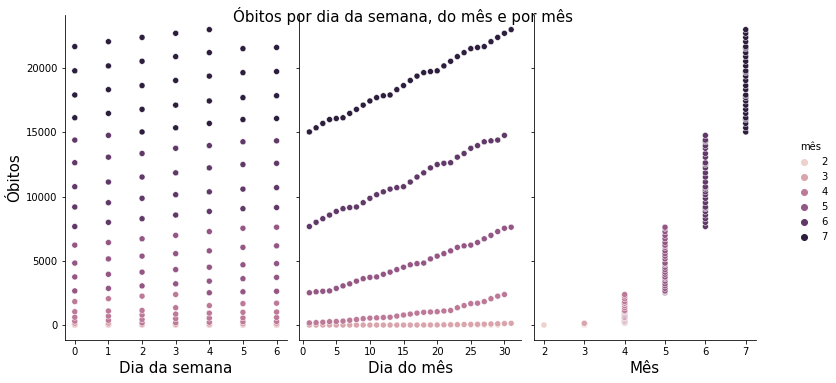

In [ ]:
g = sns.pairplot(df_final.dropna(),
                 hue = 'mês',
                 x_vars = ['diasemana','diamês','mês'],
                 y_vars = 'Obitos')
g.fig.set_size_inches(12,6)
g.axes[0,0].set_xlabel('Dia da semana', fontsize = 15)
g.axes[0,1].set_xlabel('Dia do mês', fontsize = 15)
g.axes[0,2].set_xlabel('Mês', fontsize = 15)
g.axes[0,0].set_ylabel('Óbitos', fontsize = 15)

plt.suptitle('Óbitos por dia da semana, do mês e por mês',fontsize = 15)
plt.show()